# Exercici 1

**Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
facebook = pd.read_csv("Publicacions Facebook Thailandia.csv")

facebook


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
facebook.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Eliminem les columnes: 'Column1', 'Column2','Column3','Column4'; ja que estan buides:

In [5]:
facebook = facebook.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], axis=1) 

facebook.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Eliminem també les columnes :'status_id', 'status_published'i 'status_type perquè no la farem servir per a la nostra anàlisi:

In [6]:
facebook = facebook.drop(columns=['status_id', 'status_published','status_type'], axis=1) 

facebook.head()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


Analitzo les variables per avaluar si normalitzar, estandaritzar o fer un robustscaler:

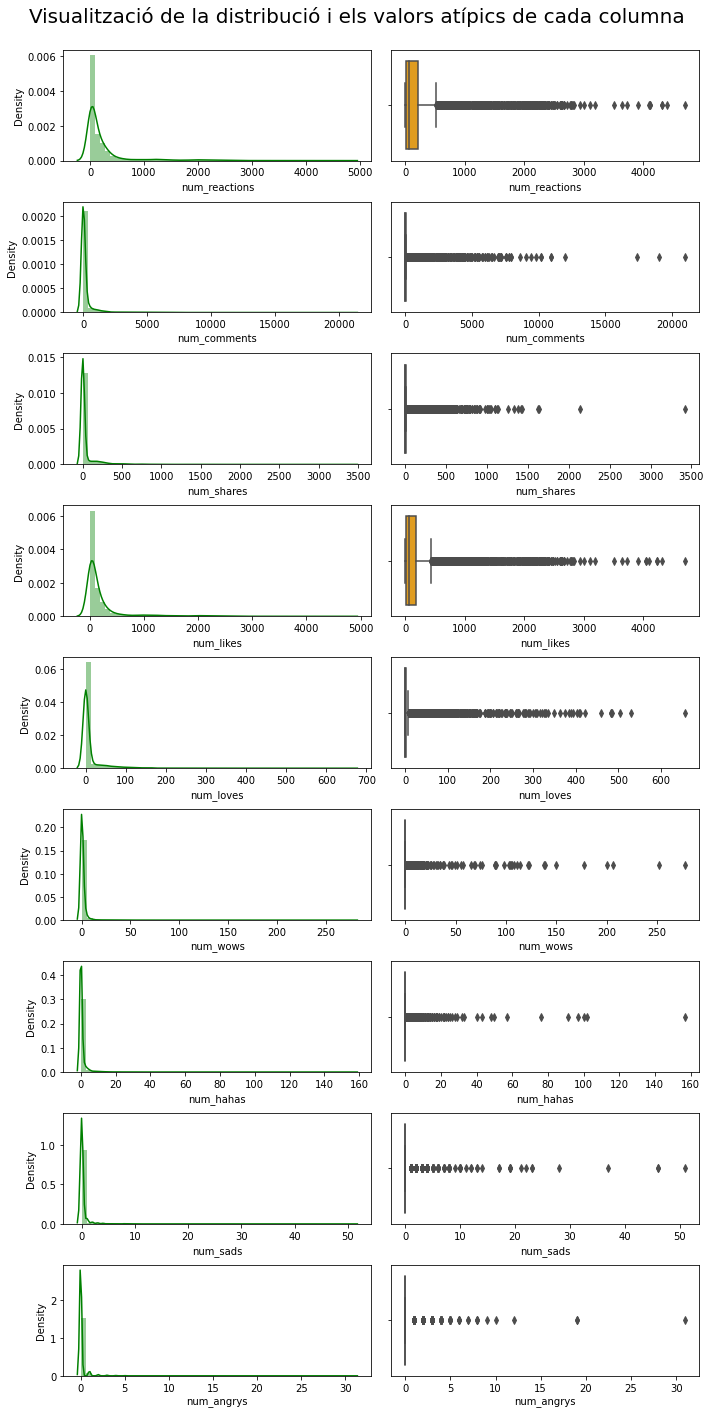

In [7]:
fig,ax = plt.subplots(9,2,figsize=(10,20))
for index,i in enumerate(facebook.columns):
    sns.distplot(facebook[i],ax=ax[index,0],color='green')
    sns.boxplot(facebook[i],ax=ax[index,1],color='orange')
    #stats.probplot(facebook[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualització de la distribució i els valors atípics de cada columna",fontsize=20);

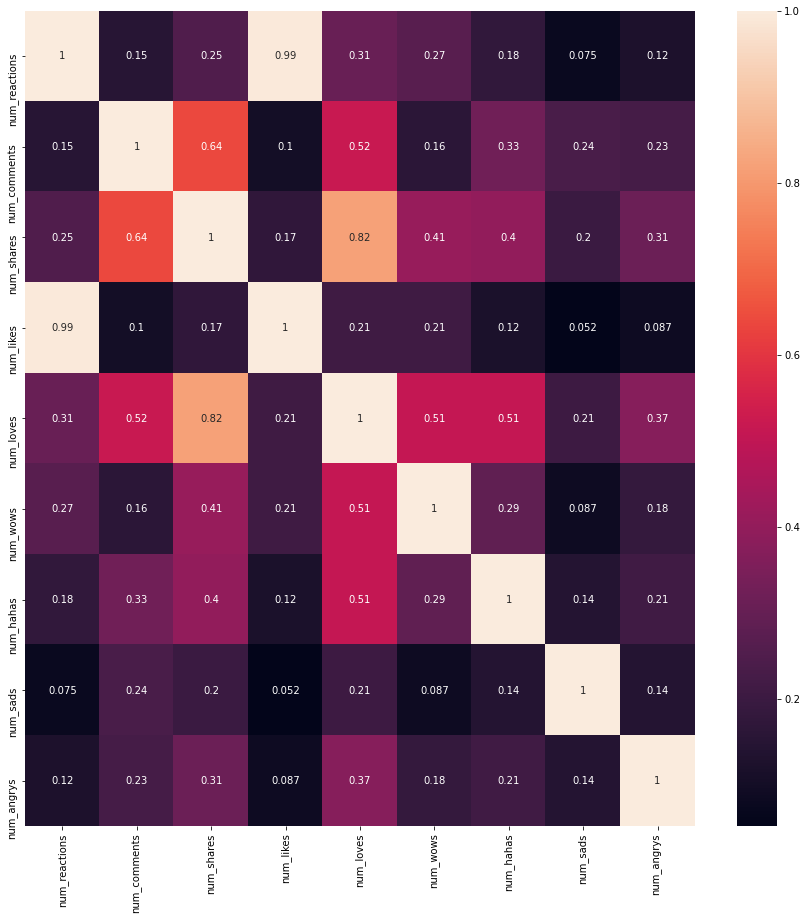

In [8]:
plt.figure(figsize=(15, 15))
corrMatrix = facebook.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [9]:
for i in facebook:
    shapiro_test = stats.shapiro(facebook[i])
    print('Per la variable ', i, "amb un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Probablement Gaussiana\n')
    else:
        print("Probablement no Gaussiana\n")

Per la variable  num_reactions amb un p-value de  0.0
Probablement no Gaussiana

Per la variable  num_comments amb un p-value de  0.0
Probablement no Gaussiana

Per la variable  num_shares amb un p-value de  0.0
Probablement no Gaussiana

Per la variable  num_likes amb un p-value de  0.0
Probablement no Gaussiana

Per la variable  num_loves amb un p-value de  0.0
Probablement no Gaussiana

Per la variable  num_wows amb un p-value de  0.0
Probablement no Gaussiana

Per la variable  num_hahas amb un p-value de  0.0
Probablement no Gaussiana

Per la variable  num_sads amb un p-value de  0.0
Probablement no Gaussiana

Per la variable  num_angrys amb un p-value de  0.0
Probablement no Gaussiana



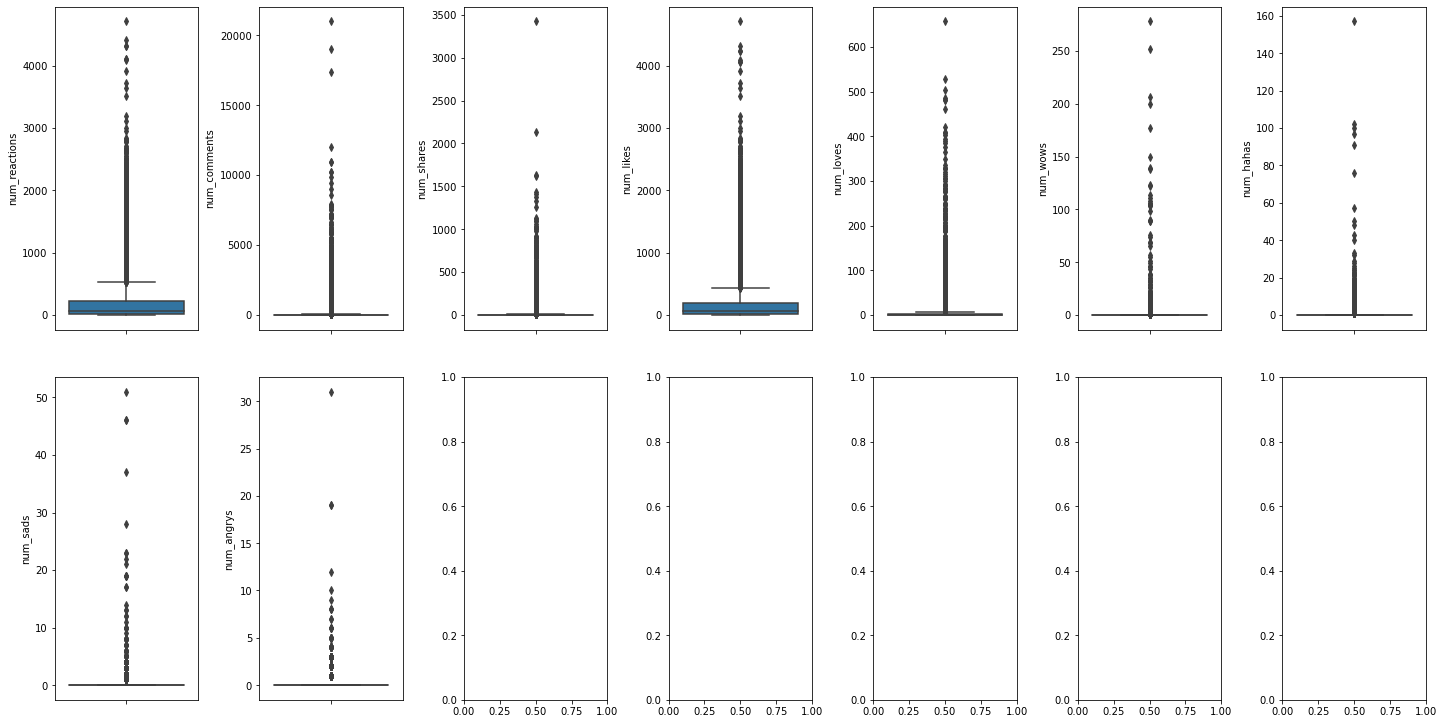

In [10]:
#checking outliers using boxplot

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
count = 0
axs = axs.flatten()
for tar,var in facebook.items():
    sns.boxplot(y=tar, data=facebook, ax=axs[count])
    count= count+1
plt.tight_layout(pad=0.5, w_pad=0.78, h_pad=4.0)

Cap columna té distribució normal i totes tenen outliers, per la qual cosa faré un Robustscaler en tots els casos, excepte a les dummies.

In [11]:
from sklearn import preprocessing 

facebook_tran = facebook.copy()

columnsR = ['num_reactions','num_comments', 'num_shares', 'num_likes', 'num_loves', 
            'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
scalerRobust = preprocessing.RobustScaler().fit(facebook_tran[columnsR])
facebook_tran[columnsR] = scalerRobust.transform(facebook_tran[columnsR])

facebook_tran.head()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0
1,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0
2,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0
3,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0
4,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0


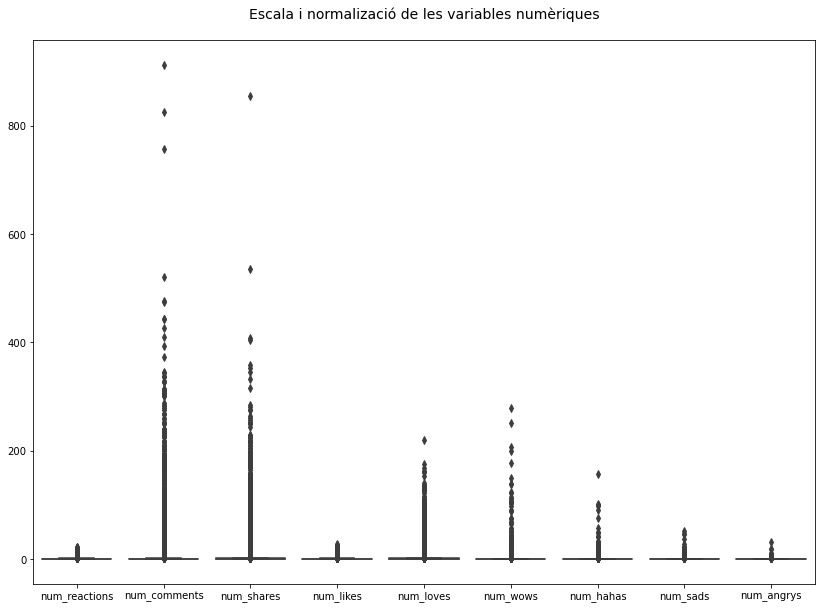

In [12]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=facebook_tran)
plt.title('Escala i normalizació de les variables numèriques\n', size = 14)
plt.show()

**PCA (Principal Component Analisis)**

Aplico PCA per reduir el nombre de variables i facilitar el clausteirng.\
[Link](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)


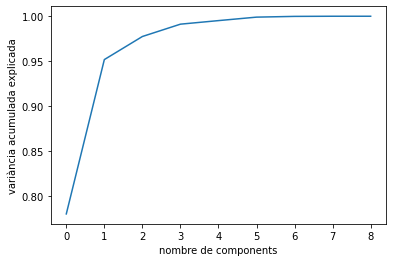

In [13]:
from sklearn.decomposition import PCA

pca = PCA().fit(facebook_tran)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de components')
plt.ylabel('variància acumulada explicada');



El nombre de components per no perdre més d'un 5% de la informació original podria estar entre 1 i 2. Provem entrenar-lo perquè en mantingui el 95%

In [14]:
pca = PCA(.95).fit(facebook)
print('El nombre de components per mantenir el 95% de la informació original és:', pca.n_components_)


El nombre de components per mantenir el 95% de la informació original és: 2


In [15]:
pca = PCA(n_components=2)
pca.fit(facebook)
facebook_pca = pd.DataFrame(pca.transform(facebook_tran), columns=['component 1', 'component 2'], index=facebook.index)
facebook_pca.head()


,component 1,component 2
0,-252.226429,-268.238417
1,-281.533294,-267.481694
2,-269.859139,-268.697342
3,-281.587924,-267.777126
4,-281.378112,-267.017846


**Número de clúster per al mètode K-means**\
[Link](https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/)

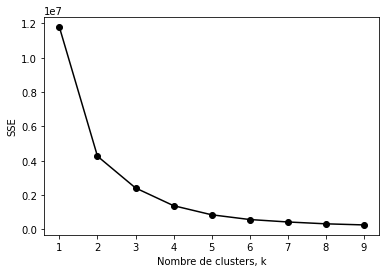

In [16]:
from sklearn.cluster import KMeans

ks = range(1, 10)
# SSE es (Sum of Squared errors)
SSE = []

for k in range(1, 10):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(facebook_pca)
    
    # Append the inertia to the list of inertias
    SSE.append(model.inertia_)
    
plt.plot(ks, SSE, '-o', color='black')
plt.xlabel('Nombre de clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

In [17]:
from kneed import KneeLocator

kl = KneeLocator(ks, SSE, curve="convex", direction="decreasing")
kl.elbow

3

En base al gràfic i al mètode per trobar el "punt de colze" que ajuda a definir la quantitat de clúster a determinar al model, utilitzaré 3

**Model: K-means**

- Inicialització del model i entrenament:

In [18]:
# Nota: 42 és una convenció,però la idea és fixar un punt on comença l'algorisme)

k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(facebook_pca)

#prediccions
y_pred = k_means.predict(facebook_pca)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [19]:


#Creo un nou df per sumar els clústers
facebook_cluster = facebook.copy()

facebook_cluster['Cluster (K-means)'] = y_pred
facebook_cluster.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster (K-means)
0,529,512,262,432,92,3,1,1,0,0
1,150,0,0,150,0,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0,0
3,111,0,0,111,0,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0,0


**Visualització de la cluster obtinguts amb K-means:**

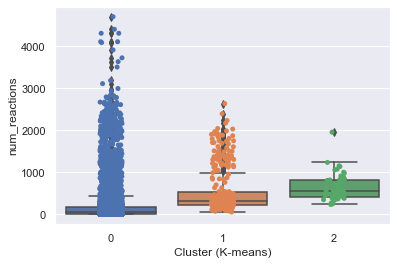

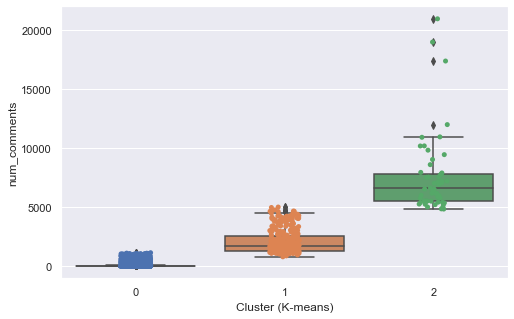

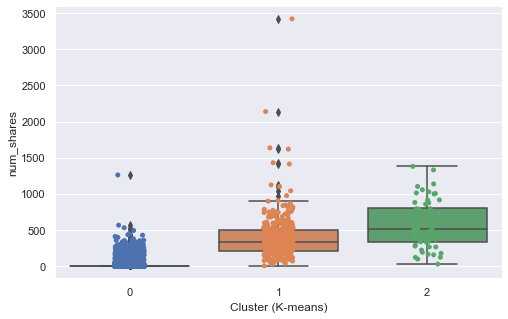

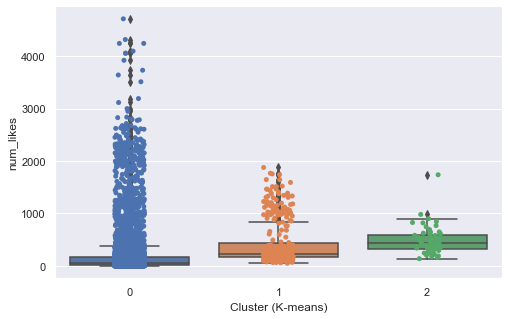

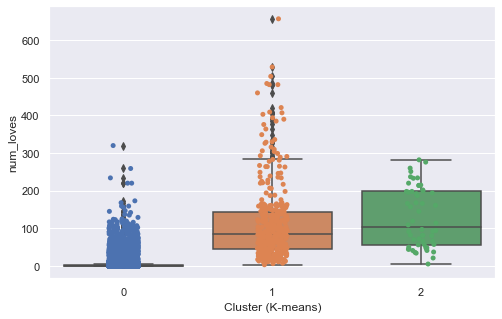

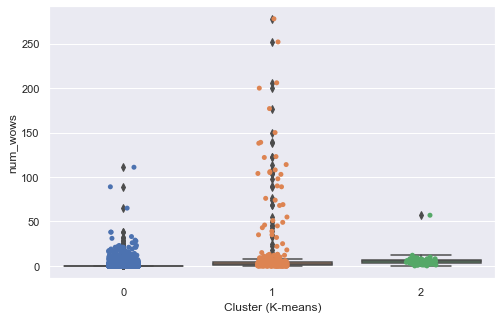

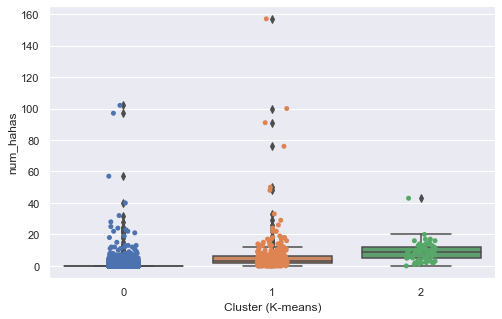

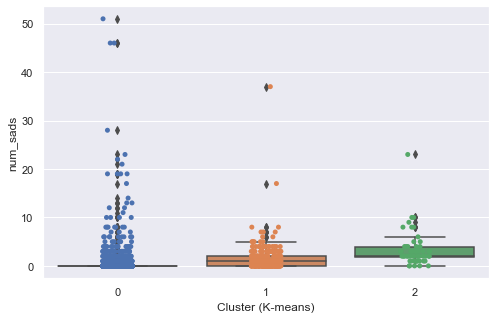

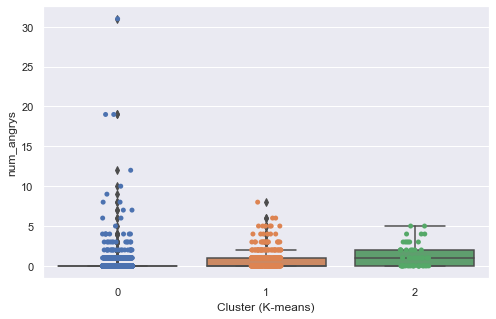

In [20]:
columns = facebook_cluster.columns[:-1]

for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster (K-means)', y=i, data=facebook_cluster)
    sns.stripplot(x='Cluster (K-means)', y=i,data=facebook_cluster)
    import seaborn as sns


Fent una primera anàlisi basada en la visualització dels tres clústers proposats pel K-mean, veiem que els organitza per ordre creixent segons el nombre d'interaccions . És a dir, el clúster 0 seria el que menys nombre d'interaccions té, després l'1 i després el 2. Això és així en totes les variables: tant en número de reaccions, com de comentaris, com de vegades compartits. I dins de les diferents reaccions, el cluster 3 seria també el de més nombre de cadascuna d'aquestes reaccions.

Si ens fixem, per exemple en el nombre de comentaris, el clúster 0 tindria una mitjana de pràcticament 0, l'1 té una mitjana d'uns 2000 comentaris i el 2 una mitjana d'uns 6500

També podem observar, veient la freqüència de cada variable, que el que més fa la gent és comentar, sobretot tenint en compte el cluster 3

Dentre les reaccions els likes són els més usats, seguits dels cors. Mentre que els wows, hahahas, caretes tristos o enfadades són molt poc usats. Per exemple, si tenim en compte el cluster 2, tenim una freqüència mitjana de 500 likes, 100 cors i menys de 20 de qualsevol de les altres.

# Exercici 2

**Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.**

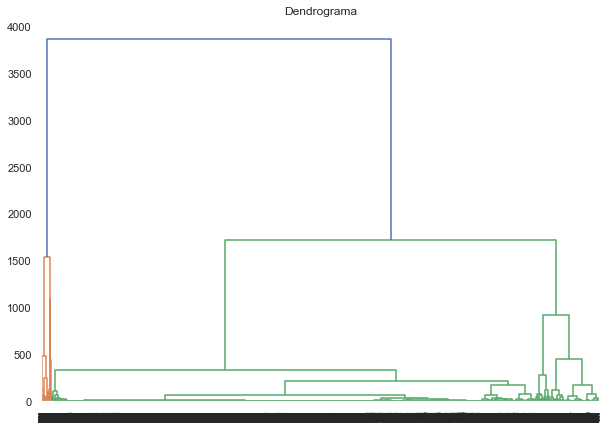

In [35]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(facebook_pca, method='ward'));

- Defineixo un llindar en 2500 (publicacions) i dibuixo una línia horitzontal que travessi la línia vertical més llarga:

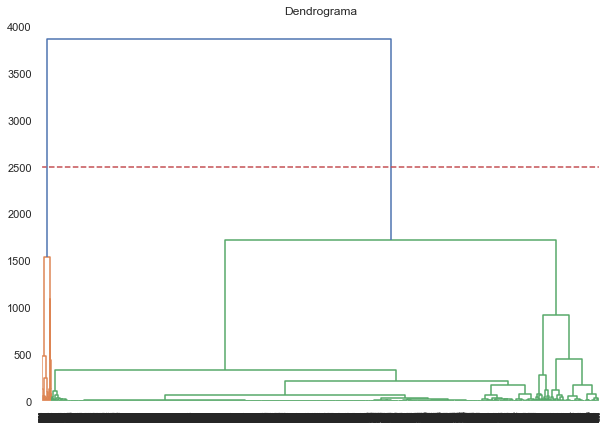

In [22]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(facebook_pca, method='ward'))
plt.axhline(y=2500, color='r', linestyle='--');

Utilitzarà dos clústers

**Model: aglomeratiu**

In [24]:
from sklearn.cluster import AgglomerativeClustering
aglomerativo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
aglomerativo.fit(facebook_pca)

pred_agg = aglomerativo.labels_

pred_agg

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
facebook_cluster['Cluster (Agglomerative)'] = pred_agg
facebook_cluster.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster (K-means),Cluster (Agglomerative)
0,529,512,262,432,92,3,1,1,0,0,0
1,150,0,0,150,0,0,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0,0,0
3,111,0,0,111,0,0,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0,0,0


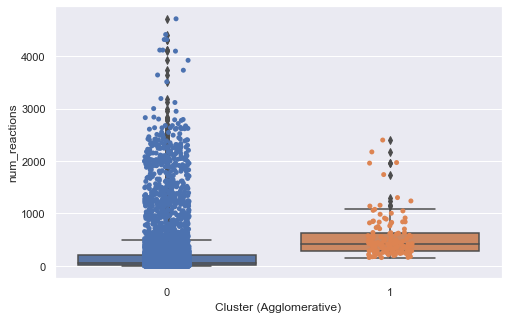

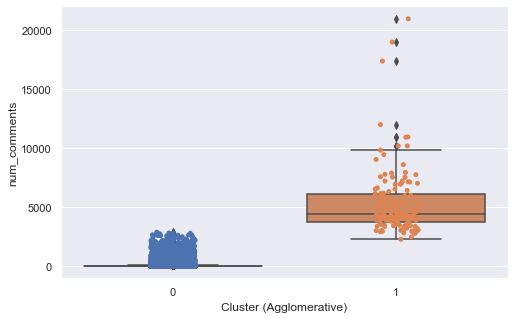

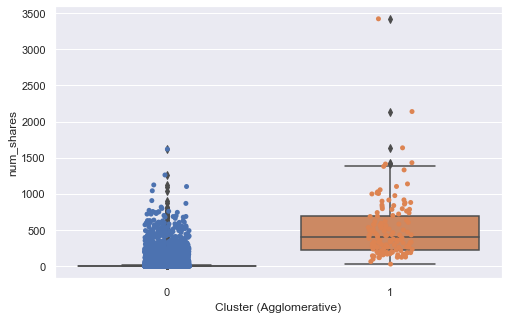

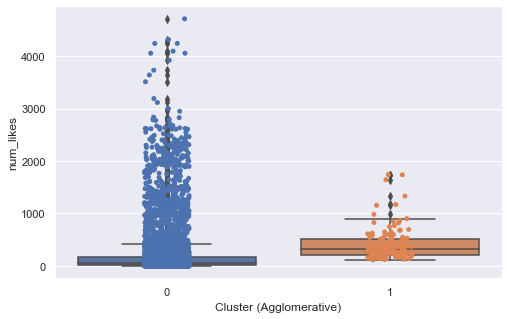

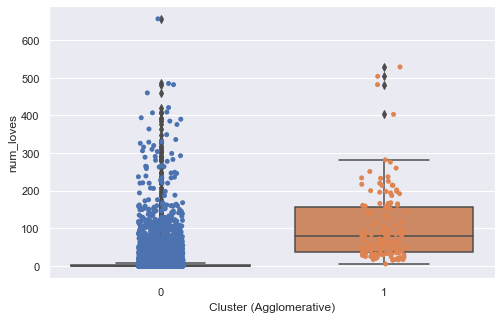

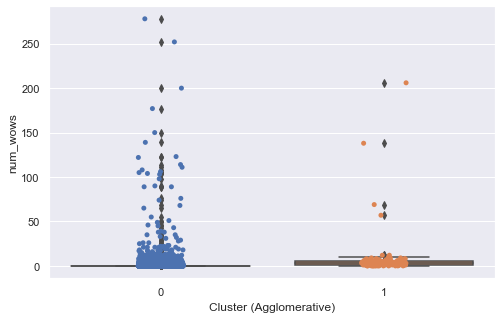

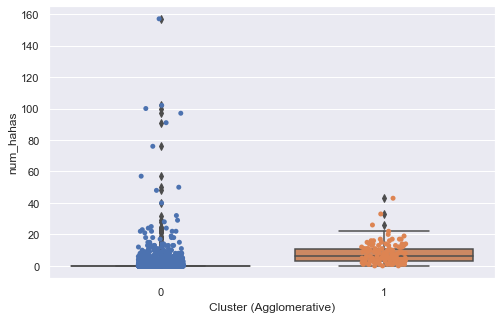

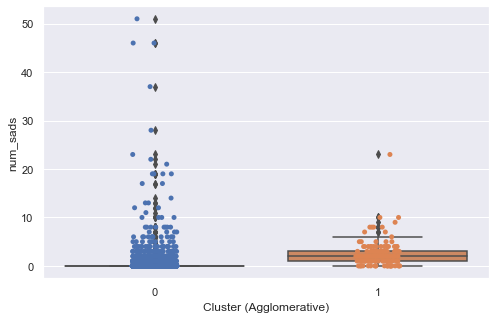

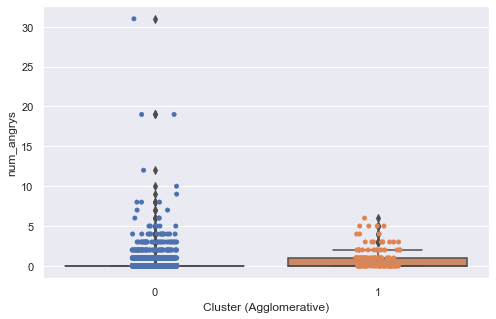

In [26]:
columns = facebook_cluster.columns[:-2]

for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster (Agglomerative)', y=i, data=facebook_cluster)
    sns.stripplot(x='Cluster (Agglomerative)', y=i,data=facebook_cluster)

Si tenim en compte els dos clústers proposats per al model aglomeratiu, veiem que igual que al k-mean, es té en compte el major o menor nombre de reaccions, sent el clúster 0 el de menor nombre en qualsevol variable que tinguem a compte

També observem que al clúster 1 el que més es fa és comentar, després reaccionar i després compartir.
Mentre que al clúster 0 sembla, en una primera anàlisi, que el que més fan és reaccionar, després comentar i després compartir.
Pel que fa a les reaccions, en els dos clústers són els likes les més usades

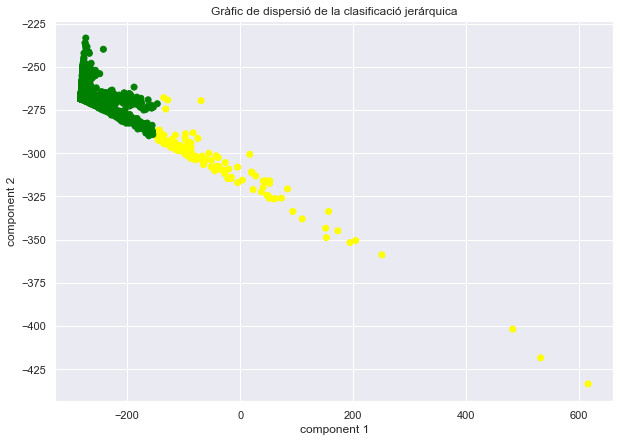

In [27]:
plt.figure(figsize=(10, 7))  

colors = np.array(['green','yellow'])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.scatter(facebook_pca['component 1'], facebook_pca['component 2'], c=colors[aglomerativo.labels_])
plt.title('Gràfic de dispersió de la clasificació jerárquica')
plt.show()


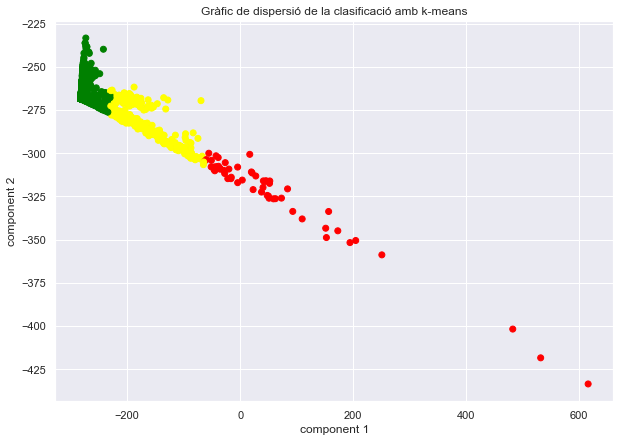

In [28]:
plt.figure(figsize=(10, 7))

colors = np.array(['green','yellow','red'])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.scatter(facebook_pca['component 1'], facebook_pca['component 2'], c=colors[y_pred])
plt.title('Gràfic de dispersió de la clasificació amb k-means')
plt.show()


En tots dos casos es veuen els clausters molt ben delimitats


# Exercici 3

**Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.**

In [37]:
from sklearn.metrics import silhouette_score


score_KM = silhouette_score(facebook_pca, k_means.labels_, metric='euclidean')

score_agg = silhouette_score(facebook_pca, aglomerativo.labels_, metric='euclidean')

print('El resultat de la proba de silhouette per el model k-means és de:', score_KM,
      '\nEl resultat de la proba de silhouette per el model jeràrquic és de:', score_agg)

El resultat de la proba de silhouette per el model k-means és de: 0.8869245347461268 
El resultat de la proba de silhouette per el model jeràrquic és de: 0.8132860632106589


El módel que millor funciona és el K-means.

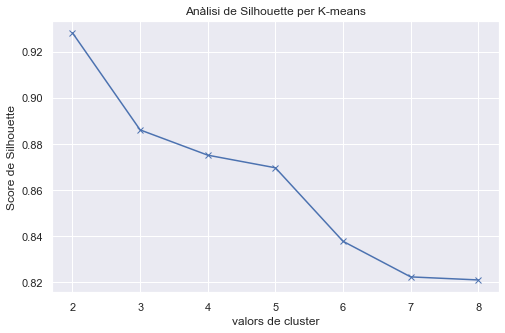

In [38]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(facebook_pca)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(facebook_pca, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
    
plt.xlabel('valors de cluster') 
plt.ylabel('Score de Silhouette') 
plt.title('Anàlisi de Silhouette per K-means')
plt.show()

A diferència del mètode de colze, Silohutte proposa 2 clúster per a k-means. Provo dividint en dos i obtenint-ne el silohuette score.

In [42]:
k_means2 = KMeans(n_clusters=2, random_state=42)
k_means2.fit(facebook_pca)

#predicciones
predicts2 = k_means2.predict(facebook_pca)
predicts2

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [43]:
score_KM2 = silhouette_score(facebook_pca, predicts2, metric='euclidean')

score_KM2

0.9282046685492579

Si fem servir el model de k-means amb dos clústers, el nostre resultat millora fins al 93%

**Conclusió:** després de les diferents anàlisis la millor clusterització sembla ser en dos grups. Si això s'aplica, el model k-means és el que dóna el millor resultat de Silhouette: 0,93.  És a dir, que qualsevol dels models són vàlids per a la nostra anàlisi, si fem la divisió en dos clústers